## A Whale Off the Port(folio) Analysis

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
#Data Cleaning

# Whale Returns
# Reading whale returns
 
whale_data = Path("whale_returns.csv")

whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_df.dropna().copy()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
#Algorithmic Daily Returns
# Reading algorithmic returns

algo_data = Path("algo_returns.csv")

algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls

algo_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_retunrs_df = algo_df.dropna().copy()
algo_retunrs_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
#S&P TSX 60 Returns

# Reading S&P TSX 60 Closing Prices

sp_tsx_data = Path("sp_tsx_history.csv")

sp_tsx_df = pd.read_csv(sp_tsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
 # Check Data Types

sp_tsx_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"]

<ipython-input-10-b5ab630708e0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")


Date
2012-10-01    12,370.19
2012-10-02    12,391.23
2012-10-03    12,359.47
2012-10-04    12,447.68
2012-10-05    12,418.99
                ...    
2019-12-20    17,118.44
2019-12-23    17,128.71
2019-12-24    17,180.15
2019-12-27    17,168.21
2019-12-30    17,098.56
Name: Close, Length: 1818, dtype: object

In [11]:
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")
sp_tsx_df["Close"]


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [12]:
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype('float')
sp_tsx_df['Close'].dtype


dtype('float64')

In [13]:
# Calculate Daily Returns

sp_tsx_daily_returns_df = sp_tsx_df.pct_change()
sp_tsx_daily_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls

sp_tsx_daily_returns_df = sp_tsx_daily_returns_df.dropna().copy()
sp_tsx_daily_returns_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [15]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx_daily_returns_df = sp_tsx_daily_returns_df.rename(columns={"Close":"S&P_TSX"})
sp_tsx_daily_returns_df.head()

,S&P_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [16]:
# Combine Whale, Algorithmic, and S&P TSX 60 Returns

# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_portfolios = pd.concat([whale_returns_df, algo_retunrs_df, sp_tsx_daily_returns_df], axis="columns", join="inner")

combined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:title={'center':'Daily Returns of all portfolios'}, xlabel='Date'>

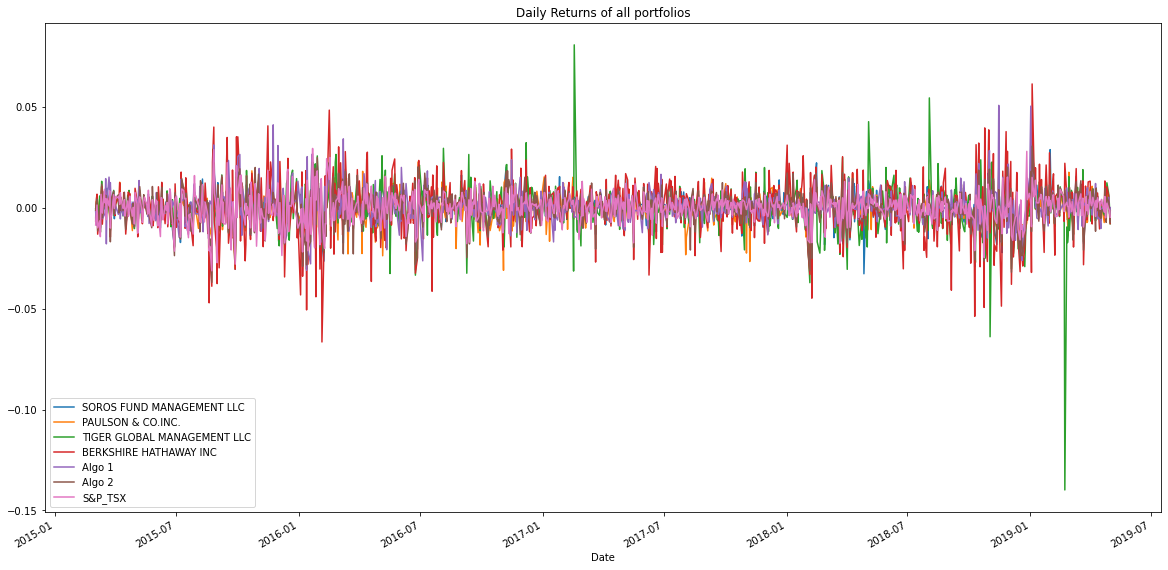

In [17]:
#Conduct Quantitative Analysis
#Performance Anlysis


#Calculate and Plot the daily returns.

combined_portfolios.plot(title = "Daily Returns of all portfolios", figsize=(20,10))

In [18]:
#Calculate and Plot cumulative returns

#Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1 + combined_portfolios).cumprod()

combined_cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:title={'center':'Cumulative Returns of all porfolios'}, xlabel='Date'>

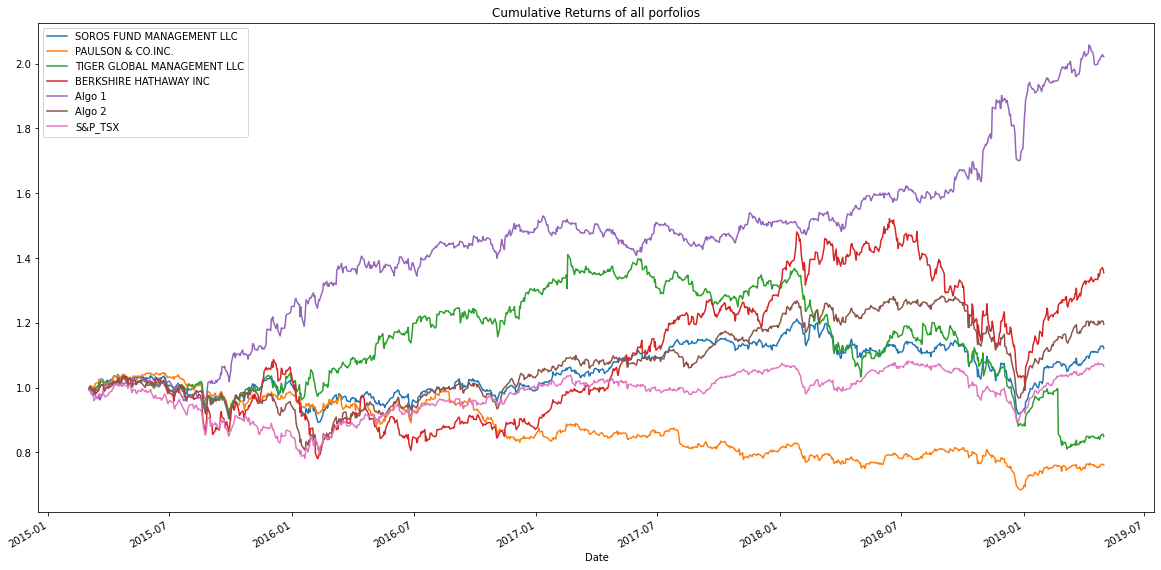

In [19]:
# Plot cumulative returns
combined_cumulative_returns.plot(title = "Cumulative Returns of all porfolios", figsize=(20,10))

## There are four portfolios that outperform S&P_TSX:
### Algo 1, Berksheire Hathway Inc, Algo 2 and Soros Fund Management Inc. 

In [20]:
#Risk Analysis
#Determine the risk of each portfolio:
#Create a box plot for each portfolio. 
#Calculate the standard deviation for all portfolios.
#Determine which portfolios are riskier than the S&P TSX 60.
#Calculate the Annualized Standard Deviation.

<AxesSubplot:>

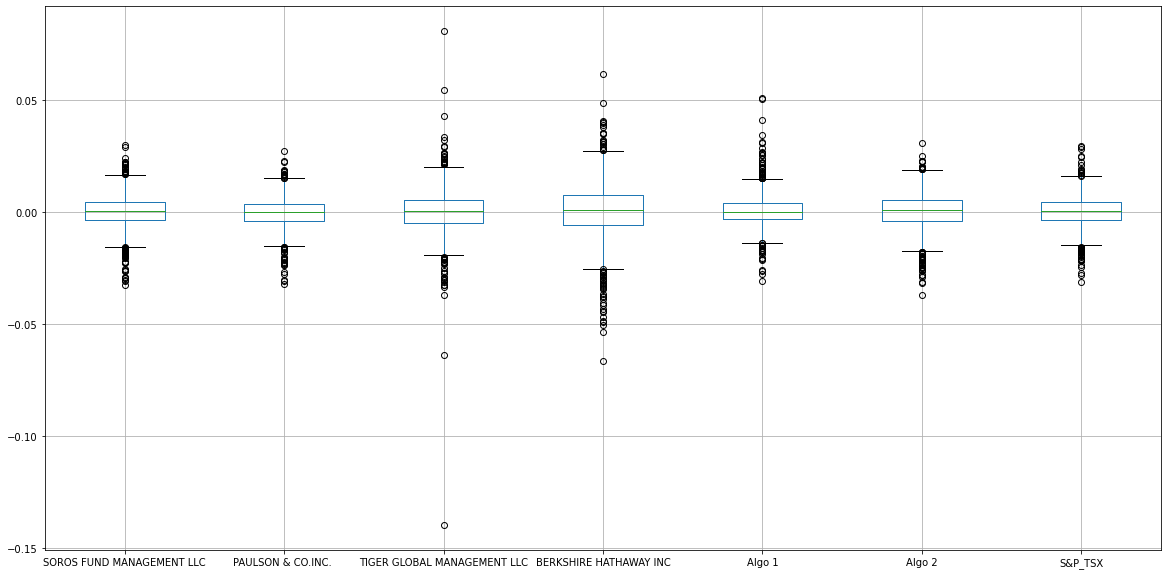

In [21]:
#Create a box plot for each portfolio
# Box plot to visually show risk

combined_portfolios.boxplot(figsize=(20,10))

In [22]:
#Calculate Standard Deviations
#Calculate the daily standard deviations of all portfolios

daily_std_allPortfolios = combined_portfolios.std().sort_values(ascending=False)
daily_std_allPortfolios 

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P_TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P TSX 60
portfolios_riskier_than_index =[daily_std_allPortfolios > daily_std_allPortfolios['S&P_TSX']]
portfolios_riskier_than_index

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 Algo 1                          True
 S&P_TSX                        False
 PAULSON & CO.INC.              False
 dtype: bool]

In [24]:
#Calculate the Annualized Standard Deviation
# Calculate the annualized standard deviation (252 trading days)

annualized_std_allPortfolios = daily_std_allPortfolios * np.sqrt(252)
annualized_std_allPortfolios

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P_TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

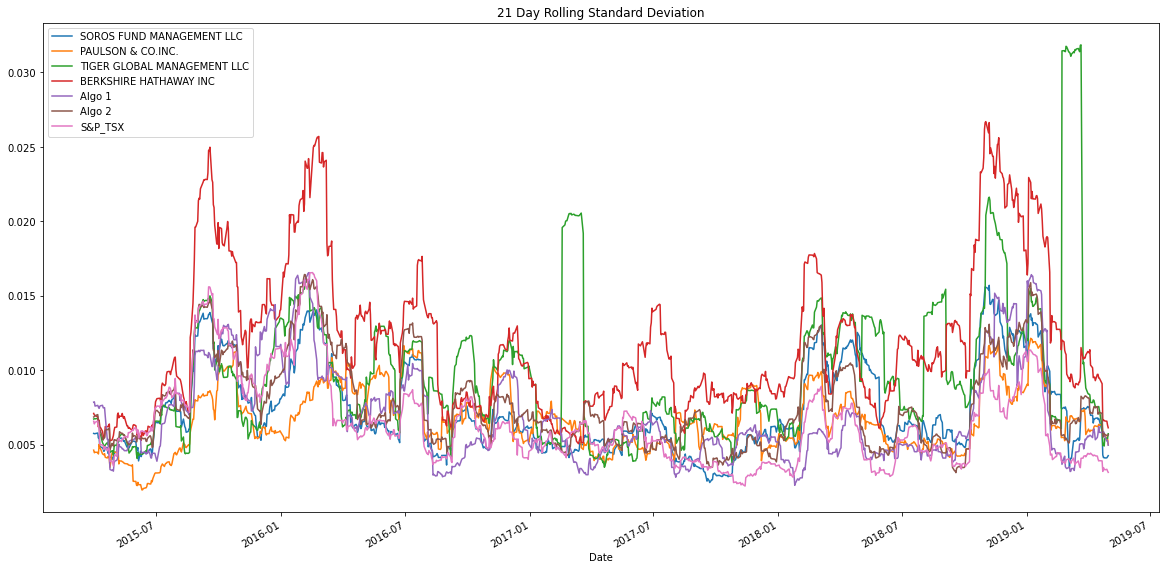

In [25]:
# Rolling Statistics
#Calculate and plot rolling std for all portfolios with 21-day window

# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolios.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))



<AxesSubplot:>

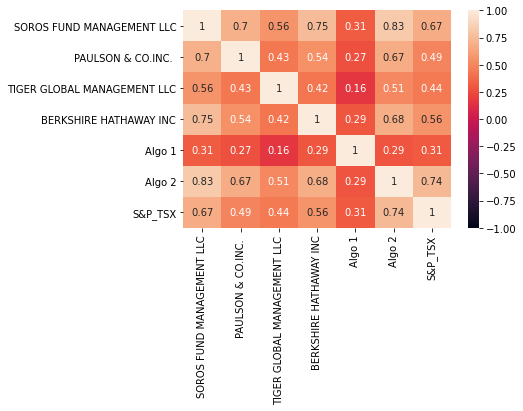

In [79]:
# Calculate the correlation
correlation = combined_portfolios.corr()

# Import the Seaborn library
import seaborn as sns

# Display de correlation matrix
sns.heatmap(correlation,  vmin=-1, vmax=1, annot=True)

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

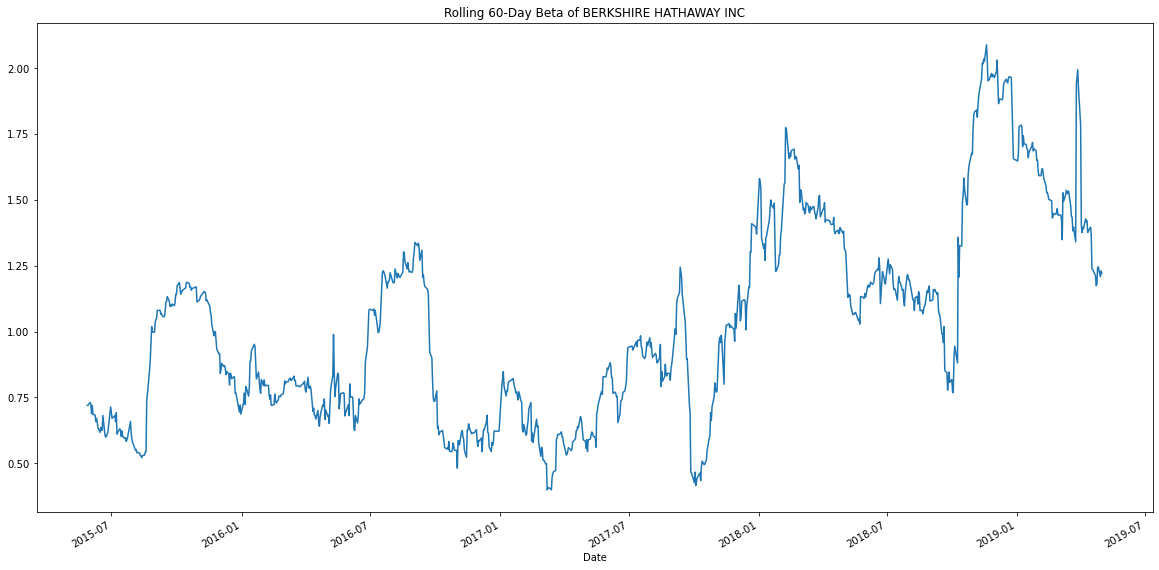

In [80]:
#Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX
# Calculate 60 day rolling covariance of a single portfolio
rollingCovariance = combined_portfolios['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_portfolios['S&P_TSX'])
# Calculate variance of S&P TSX
rollingVariance = combined_portfolios['S&P_TSX'].rolling(window=60).var()
# Computing beta
rollingBeta = rollingCovariance / rollingVariance
# Plot beta trendz 
rollingBeta.plot(figsize=(20,10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

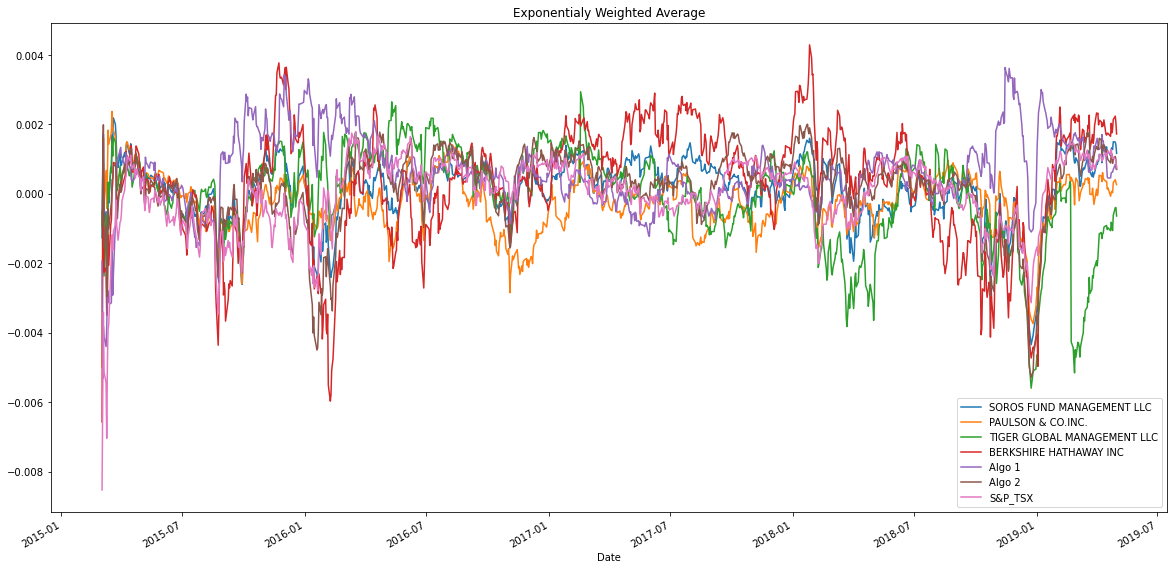

In [28]:
#Rolling Statistics Challenge: Exponentially Weighted Average
# Use `ewm` to calculate the rolling window

portfolios_ewm = combined_portfolios.ewm(halflife=21, adjust=True).mean().plot(title="Exponentialy Weighted Average", figsize=(20,10))

In [29]:
#Sharpe Ratios
#Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
# Annualized Sharpe Ratios
combined_sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P_TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Combined Sharpe Ratios'}>

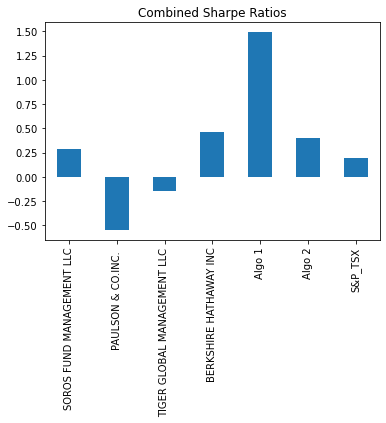

In [30]:
# Visualize the sharpe ratios as a bar plot

combined_sharpe_ratios.plot(kind="bar", title="Combined Sharpe Ratios")

## Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

### Answer: Yes the Algo 1 portfolio outperforms the S&P TSX 60 and the whales porfolio

In [42]:
# Create Custom Portfolio
#Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

#reading stock 1, dropping symbol cloumn and renaming close column to stock ticker

l_history_csvpath = Path("l_historical.csv")
l_history = pd.read_csv(l_history_csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
l_history = l_history.drop(columns=['Symbol'])
l_history.columns = ['L']
l_history.head(10)

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
2018-01-09,57.37
2018-01-10,57.09
2018-01-11,56.78
2018-01-12,56.97


In [44]:
#reading stock 2, dropping symbol cloumn and renaming close column to stock ticker

otex_historical_csvpath = Path("otex_historical.csv")
otex_history = pd.read_csv(otex_historical_csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
otex_history = otex_history.drop(columns=['Symbol'])
otex_history.columns = ['OTEX']
otex_history.head(10)

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
2018-01-09,42.13
2018-01-10,41.99
2018-01-11,42.29
2018-01-12,42.17


In [45]:
#reading stock 3, dropping symbol cloumn and renaming close column to stock ticker

shop_historical_csvpath = Path("shop_historical.csv")
shop_history = pd.read_csv(shop_historical_csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
shop_history = shop_history.drop(columns=['Symbol'])
shop_history.columns = ['SHOP']
shop_history.head(10)

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
2018-01-09,137.94
2018-01-10,139.29
2018-01-11,139.14
2018-01-12,140.76


In [54]:
# Combine all stocks in a single DataFrame

my_Portfolio = pd.concat([l_history, otex_history, shop_history], axis="columns")

# Reset Date index
my_Portfolio.sort_index(ascending = True, inplace = True)
my_Portfolio.head(10)

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
2018-01-09,57.37,42.13,137.94
2018-01-10,57.09,41.99,139.29
2018-01-11,56.78,42.29,139.14
2018-01-12,56.97,42.17,140.76


In [55]:
# Calculate daily returns

my_Portfolio_dailyReturn = my_Portfolio.pct_change()
my_Portfolio_dailyReturn.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392


In [56]:
# Drop NAs

my_Portfolio_dailyReturn = my_Portfolio_dailyReturn.dropna()
my_Portfolio_dailyReturn.head()

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


In [58]:
#Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_Portfolio_weightedReturn = my_Portfolio_dailyReturn.dot(weights)

# Display sample data
my_Portfolio_weightedReturn.head()


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

In [63]:
#Join your portfolio returns to the DataFrame that contains all of the portfolio returns
# Join your returns DataFrame to the original returns DataFrame

combined_portfolio2 = pd.concat([whale_returns_df, algo_retunrs_df, sp_tsx_daily_returns_df, my_Portfolio_weightedReturn], axis='columns', join='inner')
combined_portfolio2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [64]:
combined_portfolio2.rename(columns = {0:"myPortfolio"}, inplace = True)
combined_portfolio2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX,myPortfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [71]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_portfolio2.dropna(inplace=True)
combined_portfolio2.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX,myPortfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368,0.000528
2018-01-11,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400,0.000213
2018-01-12,0.002590,0.002418,0.003807,0.002594,-0.000875,0.002411,0.001304,0.004051
2018-01-16,-0.005126,-0.005553,0.009646,-0.011962,0.003931,-0.009533,-0.004455,-0.008559


In [70]:
#Re-run the risk analysis with your portfolio to see how it compares to the others
# Calculate the annualized `std`

#daily std 
combined_portfolio2_dailyStd = combined_portfolio2.std().sort_values(ascending=False)

# Calculate the annualized `std`
combined_portfolio2_annualStd = combined_portfolio2_dailyStd * np.sqrt(252)
combined_portfolio2_annualStd 

BERKSHIRE HATHAWAY INC         0.227445
myPortfolio                    0.224346
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
S&P_TSX                        0.099121
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

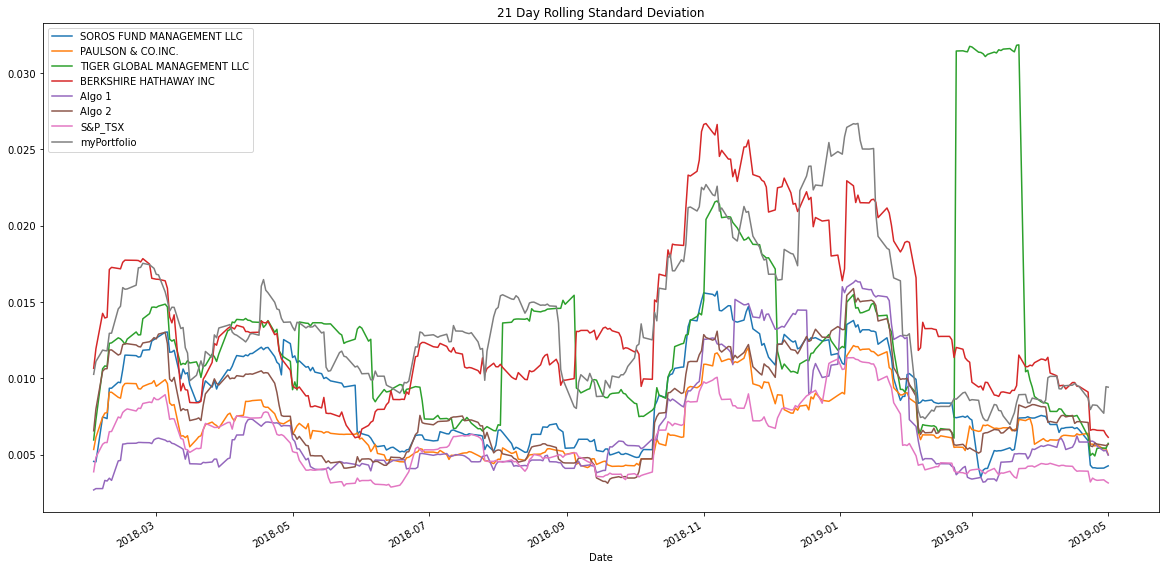

In [72]:
#Calculate and plot rolling std with 21-day window
# Calculate rolling standard deviation
# Plot rolling standard deviation

combined_portfolio2.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

In [73]:
#Calculate and plot the correlation
# Calculate and plot the correlation

combined_portfolio2_correlation = combined_portfolio2.corr()
combined_portfolio2_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX,myPortfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P_TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
myPortfolio,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


<AxesSubplot:>

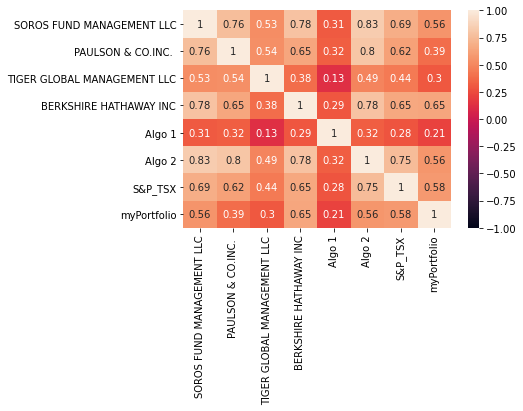

In [77]:
#plot the correlation

sns.heatmap(combined_portfolio2_correlation, vmin=-1,vmax=1, annot=True)

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

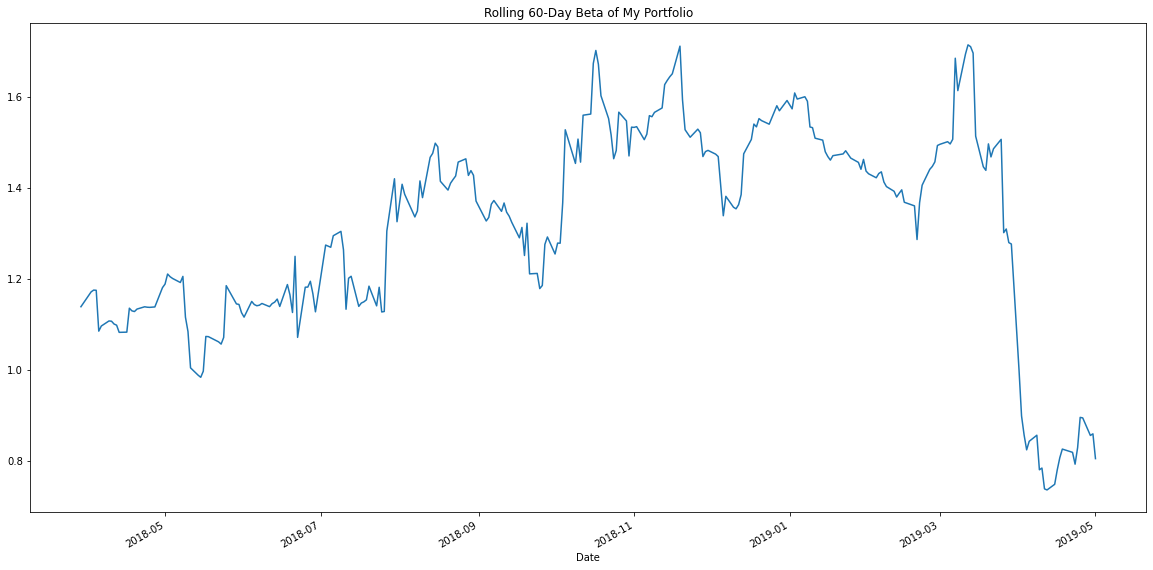

In [82]:
#Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX
# Calculate and plot Beta
# Calculate 60 day rolling covariance of a single portfolio
myPortfolio_rollingCovariance = combined_portfolio2['myPortfolio'].rolling(window=60).cov(combined_portfolio2['S&P_TSX'])
# Calculate variance of S&P TSX
myPortfolio_rollingVariance = combined_portfolio2['S&P_TSX'].rolling(window=60).var()
# Computing beta
my_portfolio_rollingBeta = myPortfolio_rollingCovariance / myPortfolio_rollingVariance
# Plot beta trendz 
my_portfolio_rollingBeta.plot(figsize=(20,10), title='Rolling 60-Day Beta of My Portfolio')

In [83]:
#Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
# Calculate Annualzied Sharpe Ratios

combinedPortfolio2_sharpe_ratios = (combined_portfolio2.mean() * 252) / (combined_portfolio2.std() * np.sqrt(252))
combinedPortfolio2_sharpe_ratios


SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P_TSX                        0.034651
myPortfolio                    1.564547
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

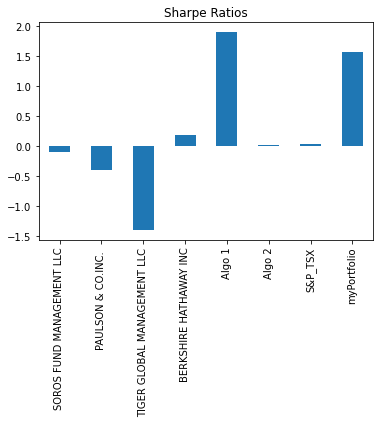

In [84]:
# Visualize the sharpe ratios as a bar plot

combinedPortfolio2_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

##  How does your portfolio do?


Reviewing the rolling std with 21-day window, my portfolio stood at the top. Also it has the second highest sharpe ratio after the Algo 1 portfolio. 
It is most correlated to Berksheire Hathway Inc and least correlated to Algo 1. 
Following is the cumulative retunrs caluculation I did for a better picture, where my portfolio has the highest returns and beats all the whale portfolio as well as the algorithmic portfolios.

<AxesSubplot:xlabel='Date'>

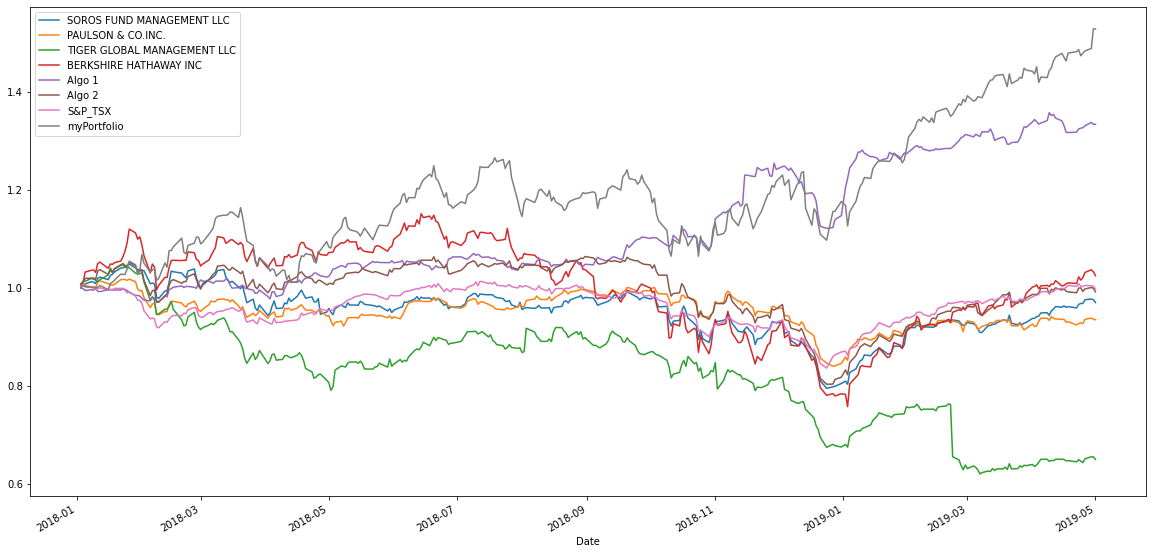

In [88]:
# Plot cumulative returns
combined_portfolio2_cumulative_returns = (1 + combined_portfolio2).cumprod()
combined_portfolio2_cumulative_returns.head()
combined_portfolio2_cumulative_returns.plot(figsize=(20,10))